In [1]:
#coding:utf-8
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go


In [2]:
pd.set_option('display.max_columns', 111)

In [3]:
housing = pd.read_csv('~/gp/datasets/cleanedtest.csv')

In [4]:
#housing = housing.sample(n=50000)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
Unnamed: 0                50000 non-null int64
Unnamed: 0.1              50000 non-null int64
_type                     50000 non-null object
area                      50000 non-null float64
big_district              50000 non-null object
building_structure        50000 non-null object
building_type             50000 non-null object
built_year                50000 non-null object
community                 50000 non-null object
community_id              50000 non-null int64
day_on_market             50000 non-null object
decoration                50000 non-null object
elevator                  50000 non-null int64
five_years                50000 non-null int64
floor                     50000 non-null object
followers                 50000 non-null int64
house_type                50000 non-null object
huxing_structure          50000 non-null object
id                        50000 

In [6]:
housing['big_district'].value_counts()

朝阳       15453
海淀        7564
丰台        7293
昌平        3958
西城        3428
通州        3009
大兴        2960
东城        2086
石景山       1450
顺义        1437
门头沟        603
房山         437
亦庄开发区      322
Name: big_district, dtype: int64

In [7]:
housing['trade_time'] = pd.to_datetime(housing['trade_time'])

In [8]:
trade_year = housing['trade_time'].apply(lambda x: x.year)

In [9]:
year_avg_price=housing.groupby(trade_year)['price'].mean()
year_avg_price_unit = housing.groupby(trade_year)['price_unit'].mean()
year_avg_price

trade_time
2010    104.954717
2011    165.971292
2012    196.444462
2013    261.125043
2014    278.835708
2015    311.828814
2016    422.009228
2017    526.813868
2018    502.687365
2019    512.961686
Name: price, dtype: float64

In [10]:
housing.sample(n=20)

,Unnamed: 0,Unnamed: 0.1,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north,building_time_delta,RDOM,lat,lng,bedroom,livingroom,kitchen,bathroom
29713,146547,184271,chengJiaoItem,91.62,朝阳,钢混结构,板塔结合,1997-01-01,望京新城,1111027380317,2017-07-18,精装,1,1,低楼层,99,2室1厅1厨1卫,平层,101101829710,西北,500.0,54574,普通住宅,5.000000,望京,1,2018-02-05,0,https://bj.lianjia.com/chengjiao/101101829710....,1,0,0,0,0,0,0,0,1,7503,202,39.991162,116.475654,2.0,1.0,1.0,1.0
32473,87003,18689,chengJiaoItem,74.96,昌平,混合结构,板楼,1999-01-01,西环里,1111027380837,2018-09-08,简装,0,1,高楼层,4,2室1厅1厨1卫,平层,101103303522,南 北,279.0,37220,普通住宅,3.000000,西关环岛,0,2018-09-18,0,https://bj.lianjia.com/chengjiao/101103303522....,1,1,1,0,0,0,0,0,0,7190,10,40.234021,116.230899,2.0,1.0,1.0,1.0
27648,193644,84400,chengJiaoItem,74.20,海淀,混合结构,板楼,1998-01-01,双紫小区,1111027379733,2016-12-13,精装,0,1,低楼层,24,2室1厅1厨1卫,平层,101100957011,南 西,633.0,85310,普通住宅,2.000000,紫竹桥,0,2016-12-30,0,https://bj.lianjia.com/chengjiao/101100957011....,1,0,1,0,1,0,0,0,0,6921,17,39.945657,116.306453,2.0,1.0,1.0,1.0
40149,79249,89785,chengJiaoItem,69.02,通州,混合结构,板楼,2005-01-01,运河居,1111027381706,2013-06-26,其他,0,1,中楼层,0,1室1厅1厨1卫,平层,BJTJ86054722,南 北,142.0,20574,普通住宅,3.000000,乔庄,0,2013-06-26,0,https://bj.lianjia.com/chengjiao/BJTJ86054722....,1,1,1,0,0,0,0,0,0,3098,0,39.901518,116.700571,1.0,1.0,1.0,1.0
32810,119631,108903,chengJiaoItem,69.65,朝阳,钢混结构,塔楼,1994-01-01,花家地北里,1111027375060,2016-03-25,其他,1,0,中楼层,0,3室1厅1厨1卫,平层,BJCY91843193,东 南,338.0,48529,普通住宅,4.000000,望京,1,2016-03-25,0,https://bj.lianjia.com/chengjiao/BJCY91843193....,1,0,1,1,0,0,0,0,0,8119,0,39.991923,116.472627,3.0,1.0,1.0,1.0
25974,103909,65288,chengJiaoItem,93.76,朝阳,钢混结构,板楼,2001-01-01,世纪龙祥嘉园,1111027379363,2015-12-19,精装,1,1,高楼层,1,2室1厅1厨1卫,平层,BJCY91184735,东 南,348.0,37117,普通住宅,2.000000,奥林匹克公园,0,2015-12-19,0,https://bj.lianjia.com/chengjiao/BJCY91184735....,0,0,1,1,0,0,0,0,0,5465,0,40.042640,116.410616,2.0,1.0,1.0,1.0
30362,99080,51848,chengJiaoItem,55.44,朝阳,钢混结构,板楼,1982-01-01,白家庄东里,1111027375954,2012-11-28,其他,1,1,底层,0,2室1厅1厨1卫,平层,BJCY84700637,南 北,183.0,33009,普通住宅,3.000000,团结湖,1,2012-11-28,0,https://bj.lianjia.com/chengjiao/BJCY84700637....,1,1,1,0,0,0,0,0,0,11289,0,39.936386,116.469050,2.0,1.0,1.0,1.0
46436,66473,55481,chengJiaoItem,128.00,顺义,混合结构,板楼,2000-01-01,裕龙六区,1111027381870,2016-11-04,精装,0,1,高楼层,26,3室2厅1厨2卫,平层,101100804653,南 北,400.0,31250,普通住宅,2.000000,顺义城,0,2016-11-28,0,https://bj.lianjia.com/chengjiao/101100804653....,0,1,1,0,0,0,0,0,0,6152,24,40.123527,116.681408,3.0,2.0,1.0,2.0
29582,144702,179190,chengJiaoItem,38.54,朝阳,钢混结构,塔楼,2006-01-01,青年汇佳园,1111027378890,2018-09-13,精装,1,0,低楼层,0,1室0厅1厨1卫,平层,101103330691,北,295.0,76544,普通住宅,6.000000,朝青,1,2018-09-14,0,https://bj.lianjia.com/chengjiao/101103330691....,0,1,0,0,0,0,0,0,0,4638,1,39.927369,116.522132,1.0,0.0,1.0,1.0
34539,127822,133512,chengJiaoItem,56.08,朝阳,钢混结构,板塔结合,2009-01-01,天泰苑A8区,1111027380052,2016-02-22,精装,1,1,高楼层,5,1室1厅1厨1卫,平层,BJCY91580974,南,195.0,34772,普通住宅,4.000000,定福庄,1,2016-02-22,0,https://bj.lianjia.com/chengjiao/BJCY91580974....,0,0,1,0,0,0,0,0,0,2608,0,39.910925,116.413384,1.0,1.0,1.0,1.0


In [11]:
housing['big_district'].unique()

array(['丰台', '石景山', '海淀', '朝阳', '顺义', '西城', '东城', '亦庄开发区', '通州', '大兴',
       '昌平', '房山', '门头沟'], dtype=object)

In [12]:
big_district_df_dic = {}

for i in list(housing['big_district'].unique()):
    filter_df = housing[housing['big_district']==i]
    trade_year = filter_df['trade_time'].apply(lambda x: x.year)
    big_district_df_dic[i] = filter_df.groupby(trade_year)['price'].mean().reset_index()
big_district_df_dic['东城']

,trade_time,price
0,2011,610.450000
1,2012,298.898039
2,2013,337.565217
3,2014,319.311321
4,2015,415.799711
5,2016,577.514107
6,2017,697.926554
7,2018,623.106223
8,2019,632.844262


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
Unnamed: 0                50000 non-null int64
Unnamed: 0.1              50000 non-null int64
_type                     50000 non-null object
area                      50000 non-null float64
big_district              50000 non-null object
building_structure        50000 non-null object
building_type             50000 non-null object
built_year                50000 non-null object
community                 50000 non-null object
community_id              50000 non-null int64
day_on_market             50000 non-null object
decoration                50000 non-null object
elevator                  50000 non-null int64
five_years                50000 non-null int64
floor                     50000 non-null object
followers                 50000 non-null int64
house_type                50000 non-null object
huxing_structure          50000 non-null object
id                        50000 

In [14]:
cols = ['area','warm','subway','five_years','two_years','building_time_delta','orientation_north','orientation_south'
       ,'orientation_east','orientation_west','building_time_delta','bedroom','livingroom','kitchen','bathroom'
       ,'price']
df = housing[cols]

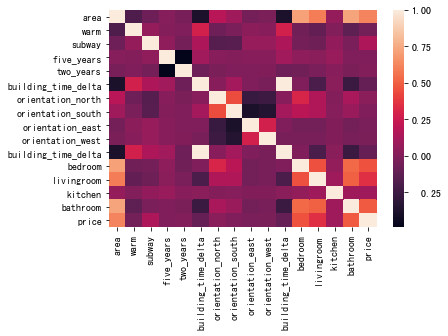

In [15]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [16]:
corr

,area,warm,subway,five_years,two_years,building_time_delta,orientation_north,orientation_south,orientation_east,orientation_west,building_time_delta,bedroom,livingroom,kitchen,bathroom,price
area,1.000000,-0.184397,-0.068415,0.017078,-0.034711,-0.378324,0.186216,0.100441,-0.043876,-0.017289,-0.378324,0.715687,0.596544,0.067538,0.729924,0.619675
warm,-0.184397,1.000000,0.066390,0.006397,-0.010676,0.285448,-0.064738,-0.026704,0.036134,0.020128,0.285448,-0.056543,-0.106636,0.002342,-0.126818,-0.046537
subway,-0.068415,0.066390,1.000000,0.051435,-0.044488,0.150281,-0.156432,-0.142222,0.070439,0.070483,0.150281,-0.046180,-0.069798,0.055569,-0.024583,0.149908
five_years,0.017078,0.006397,0.051435,1.000000,-0.488130,0.105981,0.022426,0.007668,0.019146,0.018963,0.105981,0.043155,0.024869,0.077234,-0.010677,-0.010072
two_years,-0.034711,-0.010676,-0.044488,-0.488130,1.000000,-0.068603,-0.019121,-0.011268,-0.005883,-0.004969,-0.068603,-0.058155,-0.027690,0.021072,-0.022422,0.002705
building_time_delta,-0.378324,0.285448,0.150281,0.105981,-0.068603,1.000000,0.022302,0.114253,-0.006890,-0.034115,1.000000,-0.006528,-0.196500,0.026721,-0.257847,-0.095219
orientation_north,0.186216,-0.064738,-0.156432,0.022426,-0.019121,0.022302,1.000000,0.447164,-0.266518,-0.251266,0.022302,0.311235,0.152943,0.007876,0.133281,0.028986
orientation_south,0.100441,-0.026704,-0.142222,0.007668,-0.011268,0.114253,0.447164,1.000000,-0.380823,-0.344233,0.114253,0.196281,0.158105,0.014427,0.084662,-0.010091
orientation_east,-0.043876,0.036134,0.070439,0.019146,-0.005883,-0.006890,-0.266518,-0.380823,1.000000,0.288464,-0.006890,-0.046470,-0.048694,-0.001003,-0.048703,-0.023724
orientation_west,-0.017289,0.020128,0.070483,0.018963,-0.004969,-0.034115,-0.251266,-0.344233,0.288464,1.000000,-0.034115,-0.030301,-0.034113,-0.001611,-0.031429,-0.020787


In [17]:
cols = ['area','warm','subway','five_years','building_time_delta','orientation_south','RDOM','bedroom','livingroom'
       ,'price']
df = housing[cols]
df['warm'].value_counts()

1    42421
0     7579
Name: warm, dtype: int64

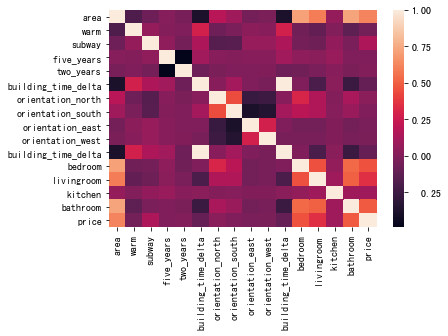

In [18]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [19]:
housing.groupby(['big_district','warm'])['id'].count()

big_district  warm
东城            0         257
              1        1829
丰台            0        1227
              1        6066
亦庄开发区         0          14
              1         308
大兴            0         488
              1        2472
房山            0         131
              1         306
昌平            0        1481
              1        2477
朝阳            0        2298
              1       13155
海淀            0         904
              1        6660
石景山           0          36
              1        1414
西城            0         235
              1        3193
通州            0         339
              1        2670
门头沟           0          35
              1         568
顺义            0         134
              1        1303
Name: id, dtype: int64

In [20]:
housing[housing['floor']=='地下室']

,Unnamed: 0,Unnamed: 0.1,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north,building_time_delta,RDOM,lat,lng,bedroom,livingroom,kitchen,bathroom
48,1372,3993,chengJiaoItem,80.30,东城,钢混结构,板塔结合,2002-01-01,金鱼池中区,1111027377502,2019-02-21,毛坯,0,1,地下室,30,3室1厅1厨1卫,平层,101104110002,东 南 北,405.0,50436,普通住宅,2.000000,天坛,1,2019-04-07,0,https://bj.lianjia.com/chengjiao/101104110002....,0,1,1,1,0,0,0,0,0,6260,45,39.895931,116.416533,3.0,1.0,1.0,1.0
159,182407,53028,chengJiaoItem,66.60,海淀,钢混结构,板塔结合,1998-01-01,万泉河62号院,1111027380407,2019-03-14,其他,1,0,地下室,16,2室1厅1厨1卫,平层,101104266193,南 北,322.0,48349,普通住宅,1.000000,苏州桥,1,2019-04-06,1,https://bj.lianjia.com/chengjiao/101104266193....,1,1,1,0,0,0,0,0,0,7742,23,39.983313,116.312218,2.0,1.0,1.0,1.0
160,8716,23559,chengJiaoItem,46.58,东城,混合结构,板楼,1985-01-01,安定门东大街,1111027375579,2016-01-16,其他,0,1,地下室,3,2室1厅1厨1卫,平层,BJDC91425389,南 北,220.0,47231,普通住宅,3.000000,东直门,1,2016-01-16,0,https://bj.lianjia.com/chengjiao/BJDC91425389....,1,1,1,0,0,0,0,0,0,11337,0,39.955918,116.435867,2.0,1.0,1.0,1.0
377,8725,23573,chengJiaoItem,33.10,东城,混合结构,板楼,1985-01-01,安定门东大街,1111027375579,2018-03-24,简装,0,1,地下室,36,1室1厅1厨1卫,平层,101102692381,南,320.0,96677,普通住宅,3.000000,东直门,1,2018-05-10,0,https://bj.lianjia.com/chengjiao/101102692381....,1,0,1,0,0,0,0,0,0,12135,47,39.955918,116.435867,1.0,1.0,1.0,1.0
393,76319,81309,chengJiaoItem,112.18,通州,钢混结构,板楼,2002-01-01,长桥园公寓,1111027376534,2018-05-03,简装,1,1,地下室,355,3室1厅1厨1卫,平层,101102832498,南 北,170.0,15155,普通住宅,2.000000,通州北苑,1,2019-03-11,0,https://bj.lianjia.com/chengjiao/101102832498....,0,1,1,0,0,0,0,0,0,5966,312,39.913627,116.633458,3.0,1.0,1.0,1.0
482,114150,93708,chengJiaoItem,45.47,朝阳,钢混结构,板楼,1994-01-01,安慧东里,1111027375593,2015-06-30,简装,1,0,地下室,3,1室1厅1厨1卫,平层,BJCY89558902,南 北,122.5,26941,普通住宅,1.500000,亚运村小营,1,2015-06-30,1,https://bj.lianjia.com/chengjiao/BJCY89558902....,1,1,1,0,0,0,0,0,0,7850,0,39.996572,116.428759,1.0,1.0,1.0,1.0
611,168728,15084,chengJiaoItem,56.80,海淀,混合结构,板楼,1994-01-01,万寿路12号院,1111027380442,2012-05-31,其他,0,0,地下室,0,2室1厅1厨1卫,平层,BJHD84561506,东 南,120.0,21127,普通住宅,3.000000,公主坟,1,2012-05-31,0,https://bj.lianjia.com/chengjiao/BJHD84561506....,1,0,1,1,0,0,0,0,0,6725,0,39.916943,116.302995,2.0,1.0,1.0,1.0
891,169278,16568,chengJiaoItem,62.70,海淀,混合结构,板楼,1994-01-01,万寿路12号院,1111027380442,2016-04-19,精装,0,0,地下室,52,2室1厅1厨1卫,平层,101092027161,南 北,280.0,44658,普通住宅,2.000000,公主坟,1,2016-09-09,1,https://bj.lianjia.com/chengjiao/101092027161....,1,1,1,0,0,0,0,0,0,8144,143,39.916943,116.302995,2.0,1.0,1.0,1.0
1441,122725,117990,chengJiaoItem,31.27,朝阳,钢混结构,板楼,2007-01-01,融科橄榄城二期,1111027379028,2015-06-27,其他,1,0,地下室,0,1室0厅0厨0卫,平层,BJCY89700726,东 南,36.0,11513,普通住宅,0.500000,望京,1,2015-06-27,0,https://bj.lianjia.com/chengjiao/BJCY89700726....,1,0,1,1,0,0,0,0,0,3099,0,40.002666,116.494371,1.0,0.0,0.0,0.0
2134,114038,93476,chengJiaoItem,39.24,朝阳,混合结构,板楼,2015-01-01,安慧东里,1111027375593,2018-10-03,简装,0,0,地下室,38,1室1厅1厨1卫,平层,101103456935,西南,200.0,50969,普通住宅,5.000000,亚运村小营,1,2019-02-26,1,https://bj.lianjia.com/chengjiao/101103456935....,1,0,0,0,0,0,0,1,0,1371,146,39.996572,116.428759,1.0,1.0,1.0,1.0


In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
Unnamed: 0                50000 non-null int64
Unnamed: 0.1              50000 non-null int64
_type                     50000 non-null object
area                      50000 non-null float64
big_district              50000 non-null object
building_structure        50000 non-null object
building_type             50000 non-null object
built_year                50000 non-null object
community                 50000 non-null object
community_id              50000 non-null int64
day_on_market             50000 non-null object
decoration                50000 non-null object
elevator                  50000 non-null int64
five_years                50000 non-null int64
floor                     50000 non-null object
followers                 50000 non-null int64
house_type                50000 non-null object
huxing_structure          50000 non-null object
id                        50000 

In [22]:
housing['huxing_structure'].value_counts()

平层      49059
跃层        531
复式        273
Loft       88
错层         49
Name: huxing_structure, dtype: int64

In [23]:
df =housing[housing['big_district']=='东城']

In [24]:
group = df.groupby('warm')['id'].count()

In [25]:
list(group.index)

[0, 1]

In [26]:
df.groupby('warm')['price_unit'].mean()/100

warm
0    738.322996
1    783.538196
Name: price_unit, dtype: float64

In [27]:
df = housing[housing['big_district']=='东城']

In [28]:
group = df.groupby('community')['lat'].mean()

In [29]:
group

community
NAGA上院        39.947970
万国城MOMA       39.953874
三元街11号        39.876826
三元街19号        39.876353
三眼井胡同         39.934272
三秀涵雅          39.964090
上龙西里          39.958801
东中街           39.942887
东交民巷32号院      39.908484
东公街64号院       39.947583
东厂北巷          39.929291
东厂胡同          39.928609
东后河沿          39.905712
东四北大街         39.939250
东四十条          39.939804
东四十条甲34号院     39.938966
东四块玉北街        39.888271
东四块玉南街甲9号楼    39.882159
东四西大街         39.930726
东城逸墅          39.944842
东堂子胡同         39.920303
东总布胡同         39.918071
东总布胡同19号院     39.918514
东方财富          39.899056
东方银座          39.945992
东棉花胡同         39.941993
东水井胡同         39.926658
东河沿           39.956416
东皇城根南街        39.939352
东直门内北小街16号    39.951681
                ...    
车站路6号院        39.876396
车辇店胡同         39.952018
远洋德邑          39.900990
郭庄北里          39.875768
金鱼池中区         39.895931
金鱼池西区         39.896236
长青园           39.882199
门楼胡同          39.942079
阳光都市          39.941120
雅宝公寓          39.920986
雍和家园一期

In [30]:
df[df['community']=='NAGA上院']

,Unnamed: 0,Unnamed: 0.1,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north,building_time_delta,RDOM,lat,lng,bedroom,livingroom,kitchen,bathroom
36890,47029,121371,chengJiaoItem,305.0,东城,钢混结构,塔楼,2008-01-01,NAGA上院,1111027378459,2015-07-07,精装,1,0,低楼层,54,3室2厅1厨3卫,平层,101089756045,东 南,2200.0,72132,普通住宅,1.333333,东直门,1,2017-01-05,0,https://bj.lianjia.com/chengjiao/101089756045....,1,0,1,1,0,0,0,0,0,2744,548,39.94797,116.434522,3.0,2.0,1.0,3.0


In [31]:
housing['decoration'].unique()

array(['精装', '简装', '其他', '毛坯'], dtype=object)

In [32]:
housing.head()

,Unnamed: 0,Unnamed: 0.1,_type,area,big_district,building_structure,building_type,built_year,community,community_id,day_on_market,decoration,elevator,five_years,floor,followers,house_type,huxing_structure,id,orientation,price,price_unit,purpose,ratio,small_district,subway,trade_time,two_years,url,warm,orientation_north,orientation_south,orientation_east,orientation_west,orientation_north_east,orientation_east_south,orientation_south_west,orientation_west_north,building_time_delta,RDOM,lat,lng,bedroom,livingroom,kitchen,bathroom
0,36951,94844,chengJiaoItem,101.81,丰台,钢混结构,塔楼,2004-01-01,未来66,1111027380346,2016-01-17,精装,1,1,高楼层,5,2室1厅1厨1卫,平层,BJFT89450406,东南,358.0,35164,普通住宅,4.666667,马家堡,1,2016-01-17,0,https://bj.lianjia.com/chengjiao/BJFT89450406....,1,0,0,0,0,0,1,0,0,4399,0,39.854229,116.377754,2.0,1.0,1.0,1.0
1,13848,35562,chengJiaoItem,97.46,石景山,钢混结构,塔楼,2003-01-01,金顶街三区,1111027377066,2018-02-08,简装,1,0,低楼层,22,2室2厅1厨1卫,平层,101102552518,东南,435.0,44634,普通住宅,3.333333,苹果园,1,2018-04-19,0,https://bj.lianjia.com/chengjiao/101102552518....,1,0,0,0,0,0,1,0,0,5517,70,39.932126,116.177036,2.0,2.0,1.0,1.0
2,176883,37305,chengJiaoItem,64.00,海淀,钢混结构,板楼,1997-01-01,定慧西里,1111027373697,2016-04-26,精装,1,1,低楼层,59,2室1厅1厨1卫,平层,101092077659,南 北,370.0,57813,普通住宅,0.500000,定慧寺,0,2016-08-23,0,https://bj.lianjia.com/chengjiao/101092077659....,1,1,1,0,0,0,0,0,0,7055,119,39.927610,116.287373,2.0,1.0,1.0,1.0
3,136862,159496,chengJiaoItem,68.55,朝阳,钢混结构,板塔结合,2007-01-01,季景沁园,1111027377212,2015-05-11,精装,1,1,高楼层,1,1室2厅1厨1卫,平层,BJCY89365015,北,282.0,41138,普通住宅,2.500000,望京,1,2015-05-11,0,https://bj.lianjia.com/chengjiao/BJCY89365015....,0,1,0,0,0,0,0,0,0,3052,0,40.001344,116.461837,1.0,2.0,1.0,1.0
4,129030,136951,chengJiaoItem,128.05,朝阳,钢混结构,塔楼,2007-01-01,嘉铭桐城F区,1111027377296,2016-06-06,简装,1,1,顶层,63,3室2厅1厨2卫,平层,101092337734,东 北,850.0,66381,公寓,3.000000,亚运村小营,1,2016-07-17,0,https://bj.lianjia.com/chengjiao/101092337734....,0,1,0,1,0,0,0,0,0,3444,41,40.010577,116.431050,3.0,2.0,1.0,2.0


In [33]:
selected_features=['area','building_structure','building_type','decoration','elevator','five_years','floor',
                  'followers','huxing_structure','price','purpose','ratio','subway','warm','orientation_south',
                  'building_time_delta','RDOM','bedroom','livingroom','kitchen','bathroom']
multicategorical_features = ['building_structure','building_type','decoration','floor','huxing_structure',
                       'purpose']

In [34]:
df = housing[selected_features]

In [35]:
df['elevator'] = df['elevator'].replace('有',1)
df['elevator'] = df['elevator'].replace('无',0)
df['warm'] = df['warm'].replace('集中供暖',1)
df['warm'] = df['warm'].replace('自供暖',0)

In [36]:
df = pd.get_dummies(df)

In [37]:
df.head()

,area,elevator,five_years,followers,price,ratio,subway,warm,orientation_south,building_time_delta,RDOM,bedroom,livingroom,kitchen,bathroom,building_structure_混合结构,building_structure_砖木结构,building_structure_砖混结构,building_structure_钢混结构,building_structure_钢结构,building_type_塔楼,building_type_平房,building_type_板塔结合,building_type_板楼,decoration_其他,decoration_毛坯,decoration_简装,decoration_精装,floor_中楼层,floor_低楼层,floor_地下室,floor_底层,floor_顶层,floor_高楼层,huxing_structure_Loft,huxing_structure_复式,huxing_structure_平层,huxing_structure_跃层,huxing_structure_错层,purpose_公寓,purpose_别墅,purpose_商业办公类,purpose_四合院,purpose_平房,purpose_底商,purpose_普通住宅,purpose_酒店式公寓
0,101.81,1,1,5,358.0,4.666667,1,1,0,4399,0,2.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,97.46,1,0,22,435.0,3.333333,1,1,0,5517,70,2.0,2.0,1.0,1.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,64.00,1,1,59,370.0,0.500000,0,1,1,7055,119,2.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,68.55,1,1,1,282.0,2.500000,1,0,0,3052,0,1.0,2.0,1.0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,128.05,1,1,63,850.0,3.000000,1,0,0,3444,41,3.0,2.0,1.0,2.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [38]:
corr = df.corr()

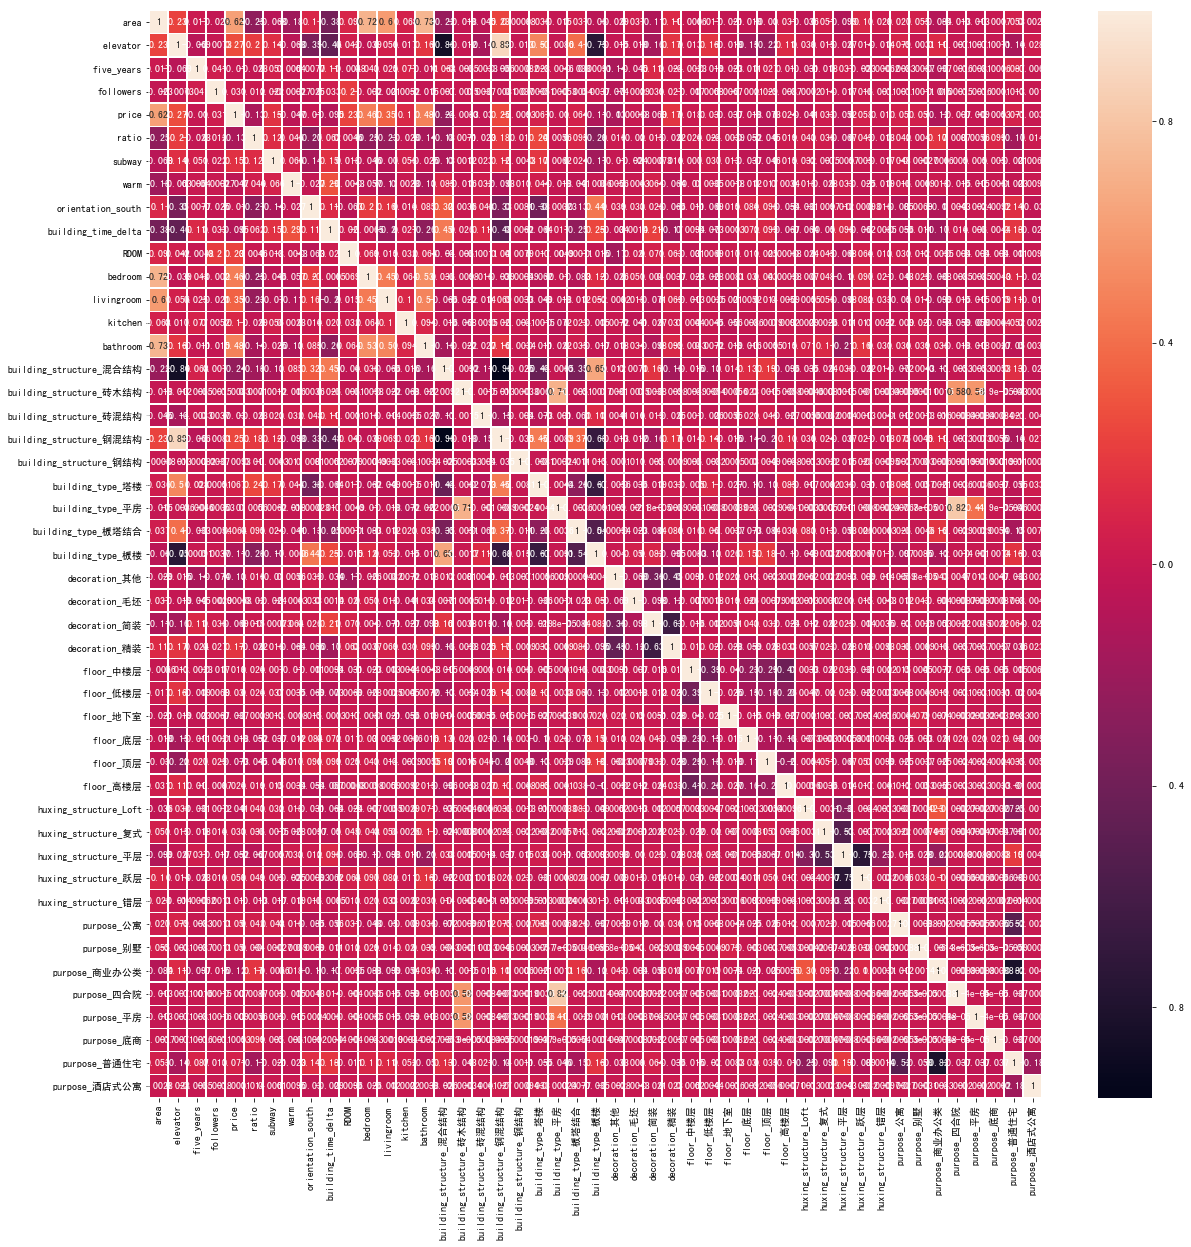

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [40]:
housing['elevator'] = df['elevator'].replace('有',1)
housing['elevator'] = df['elevator'].replace('无',0)
housing['warm'] = housing['warm'].replace('集中供暖',1)
housing['warm'] = housing['warm'].replace('自供暖',0)

In [41]:
corr2 = housing[housing.columns.difference(multicategorical_features)].corr()

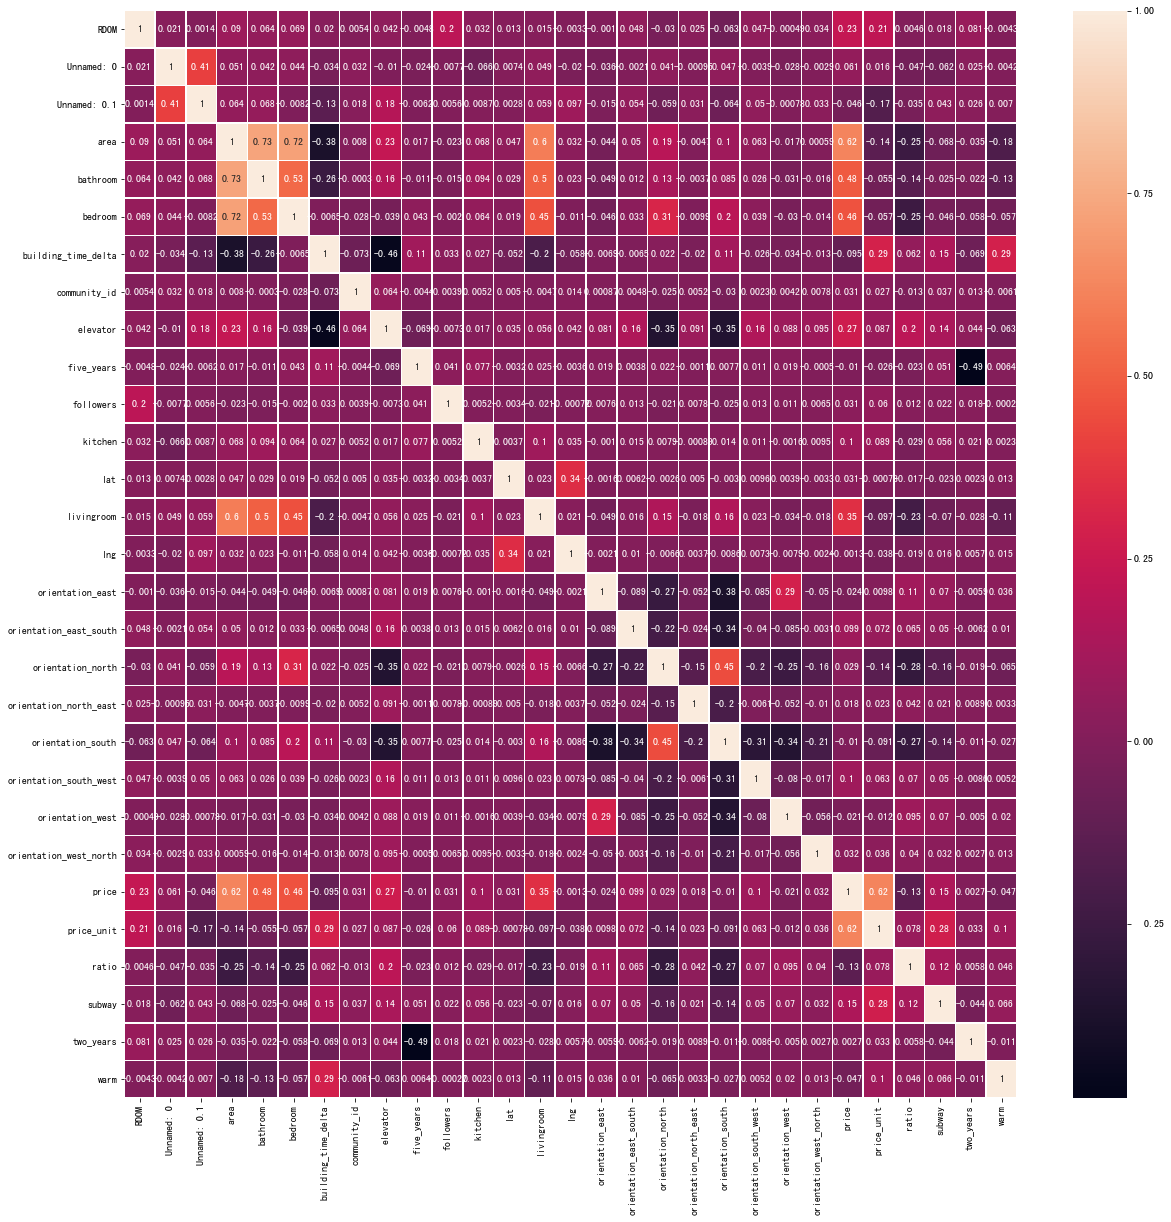

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(corr2, annot=True, linewidths=.5, ax=ax)

In [43]:
ctg_df = housing[multicategorical_features]
ctg_df.head()

,building_structure,building_type,decoration,floor,huxing_structure,purpose
0,钢混结构,塔楼,精装,高楼层,平层,普通住宅
1,钢混结构,塔楼,简装,低楼层,平层,普通住宅
2,钢混结构,板楼,精装,低楼层,平层,普通住宅
3,钢混结构,板塔结合,精装,高楼层,平层,普通住宅
4,钢混结构,塔楼,简装,顶层,平层,公寓


In [44]:
ctg_df = pd.get_dummies(ctg_df)
ctg_df['price'] = housing['price']

In [45]:
ctg_df_corr = ctg_df.corr().abs()['price'].abs()
ctg_df_corr[ctg_df_corr.sort_values()>0.1]

building_structure_混合结构    0.240767
building_structure_钢混结构    0.248078
building_type_板楼           0.108228
decoration_其他              0.130883
decoration_精装              0.171159
purpose_商业办公类              0.119059
price                      1.000000
Name: price, dtype: float64

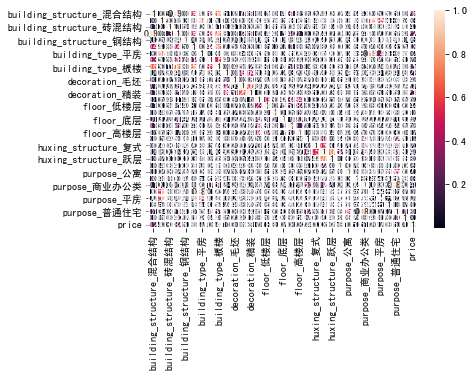

In [46]:
       # Sample figsize in inches
sns.heatmap(ctg_df.corr().abs(), annot=True, linewidths=.5)

1. area与bedroom, kitchen, livingroom有较强的相关性，选择area列
2. orientation_south与别的朝向也有较强的相关性，选择orientation_south列
3. five_years与two_years选择five_years
4. building_time_delta与elevator有较高的相关性，选择elevator
5. 去掉钢混结构
6. 去掉building_type

于是对于numerical型的变量选取'area','orientation_south','five_years','RDOM','elevator','followers','ratio','subway','kitchen','warm'

In [47]:
#num_features=['area','elevator','followers','ratio','subway','kitchen','warm']
num_features=['area','elevator','RDOM','ratio','subway','kitchen','orientation_south_west']
final_features=[item for item in num_features]
for item in multicategorical_features:
    if  item!='floor' and item!='huxing_structure':
        final_features.append(item)
final_features

['area',
 'elevator',
 'RDOM',
 'ratio',
 'subway',
 'kitchen',
 'orientation_south_west',
 'building_structure',
 'building_type',
 'decoration',
 'purpose']

In [48]:
final_df = housing[final_features]

In [49]:
final_df = pd.get_dummies(final_df)
final_df = final_df.drop('building_structure_混合结构', axis=1)
final_df = final_df.drop('building_structure_砖木结构', axis=1)
final_df = final_df.drop('building_structure_砖混结构', axis=1)
final_df = final_df.drop('building_structure_钢结构', axis=1)
final_df = final_df.drop('decoration_毛坯', axis=1)
final_df = final_df.drop('decoration_简装', axis=1)
final_df = final_df.drop('purpose_公寓', axis=1)
final_df = final_df.drop('purpose_别墅', axis=1)
final_df = final_df.drop('purpose_四合院', axis=1)
final_df = final_df.drop('purpose_平房', axis=1)
final_df = final_df.drop('purpose_底商', axis=1)
final_df = final_df.drop('purpose_普通住宅', axis=1)
final_df = final_df.drop('purpose_酒店式公寓', axis=1)
final_df = final_df.drop('building_type_塔楼', axis=1)
final_df = final_df.drop('building_type_平房', axis=1)
final_df = final_df.drop('building_type_板塔结合', axis=1)

In [50]:
len(final_df.columns)

12

In [51]:
final_df.head()

,area,elevator,RDOM,ratio,subway,kitchen,orientation_south_west,building_structure_钢混结构,building_type_板楼,decoration_其他,decoration_精装,purpose_商业办公类
0,101.81,1,0,4.666667,1,1.0,0,1,0,0,1,0
1,97.46,1,70,3.333333,1,1.0,0,1,0,0,0,0
2,64.00,1,119,0.500000,0,1.0,0,1,1,0,1,0
3,68.55,1,0,2.500000,1,1.0,0,1,0,0,1,0
4,128.05,1,41,3.000000,1,1.0,0,1,0,0,0,0


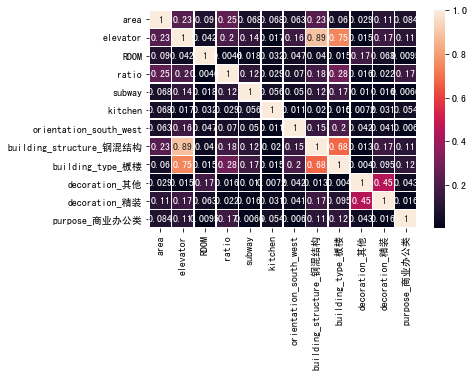

In [52]:
sns.heatmap(final_df.corr().abs(), annot=True, linewidths=.5)

In [53]:
X = final_df
Y = housing['price']
print(X.shape)
print(Y.shape)

(50000, 12)
(50000,)


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [56]:
# scaler = StandardScaler().fit(Y.values.reshape(-1,1))
# scaled_Y = scaler.transform(Y.values.reshape(-1,1))
# scaled_Y

In [57]:
from sklearn.cross_validation import train_test_split

seed = 9
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40000, 12)
(10000, 12)
(40000,)
(10000,)


/usr/local/anaconda3/envs/gp/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import make_scorer

Lasso: 0.434, 0.01
ElasticNet: 0.446, 0.01
KNN: 0.398, 0.01
DecisionTree: 0.475, 0.008
AdaBoost: 0.508, 0.03
GradientBoost: 0.359, 0.011
RandomForest: 0.378, 0.009
ExtraTrees: 0.397, 0.01


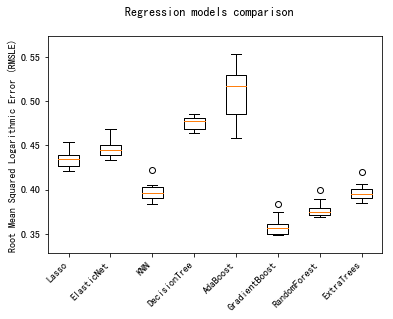

In [59]:
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []



def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

rmsle_score = make_scorer(rmsle, greater_is_better=False)


for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    #results = cross_val_score(model, X_train, Y_train.ravel(), cv=k_fold, scoring=metric)
    results = np.absolute(cross_val_score(model, X_train, Y_train.ravel(), cv=k_fold, scoring=rmsle_score))
    #results = np.sqrt(np.absolute(cross_val_score(model, X_train, Y_train.ravel(), cv=k_fold, scoring=metric)))
    
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Root Mean Squared Logarithmic Error (RMSLE)")
plt.margins(0.05, 0.1)
plt.show()

[INFO] RMSLE : 0.348


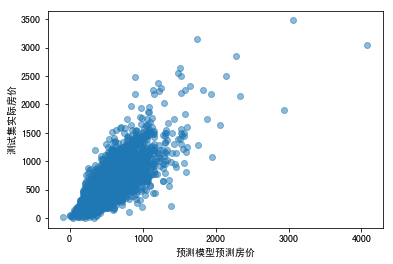

In [60]:
# create and fit the best regression model
best_model = GradientBoostingRegressor(random_state=seed)
best_model.fit(X_train, Y_train)

# make predictions using the model
predictions = best_model.predict(X_test)
print("[INFO] RMSLE : {}".format(round(rmsle(Y_test.ravel(), predictions), 3)))
#print("[INFO] RMSLE : {}".format(round(np.sqrt(mean_squared_error(Y_test.ravel(), predictions)), 3)))
plt.scatter(predictions, Y_test, alpha=0.5)
#plt.axis('scaled')
plt.ylabel(u'测试集实际房价')
plt.xlabel(u'预测模型预测房价')
plt.show()

In [61]:
ans = pd.DataFrame()
ans['实际房价(万元)'] = Y_test
ans['预测房价(万元)'] = predictions
ans

,实际房价(万元),预测房价(万元)
9112,382.8,375.663539
1597,408.0,459.108043
21092,450.0,362.210145
8391,576.0,599.548622
38471,1505.0,1075.659509
16226,299.0,421.456471
42970,556.0,491.461708
36919,170.0,292.265018
4048,291.0,336.481383
10876,270.5,380.988217


In [62]:
round(housing['price_unit']/100) * 100

0         35200.0
1         44600.0
2         57800.0
3         41100.0
4         66400.0
5         29500.0
6         64400.0
7         22500.0
8        118200.0
9         37300.0
10        45700.0
11        42900.0
12        26400.0
13        34500.0
14        55600.0
15        65700.0
16        66700.0
17        69100.0
18        46300.0
19        41800.0
20        83900.0
21        96800.0
22        62300.0
23        55100.0
24        66500.0
25        40600.0
26       102700.0
27        87200.0
28        46900.0
29        73000.0
           ...   
49970     54400.0
49971     81700.0
49972     61300.0
49973     64700.0
49974     45800.0
49975     71100.0
49976     29800.0
49977     36500.0
49978     82900.0
49979    100800.0
49980     30000.0
49981     98500.0
49982     51300.0
49983     37600.0
49984     26500.0
49985     66000.0
49986     55900.0
49987     33400.0
49988     26800.0
49989     40500.0
49990    105100.0
49991     60100.0
49992     41800.0
49993     43600.0
49994    1